<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Basic

In [83]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [84]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [85]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [86]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) +2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])
torch.Size([2, 3])


In [87]:
r = torch.rand(2,2) - 0.5 * 2
print("A random matrix, r: {}".format(r))
print("\nAbsolute value of r: {}".format(torch.abs(r)))
print("\nInverse sine of r: {}".format(torch.abs(r)))
print("\nDetermined of r: {}".format(torch.det(r)))
print("\nSingular Value decomposition of r: {}".format(torch.svd(r)))
print("\nAverage and standard deviation of r: {}".format(torch.std_mean(r)))
print("\nMaximum value of r: {}".format(torch.max(r)))

A random matrix, r: tensor([[-0.5784, -0.9309],
        [-0.7668, -0.5953]])

Absolute value of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Inverse sine of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Determined of r: -0.36948588490486145

Singular Value decomposition of r: torch.return_types.svd(
U=tensor([[-0.7512, -0.6601],
        [-0.6601,  0.7512]]),
S=tensor([1.4415, 0.2563]),
V=tensor([[ 0.6525, -0.7578],
        [ 0.7578,  0.6525]]))

Average and standard deviation of r: (tensor(0.1656), tensor(-0.7179))

Maximum value of r: -0.5783984065055847


# Autograd

In [88]:
x = torch.randn(1,10)
prev_h =torch.randn(1,20)
W_h = torch.randn(20,20)
W_x = torch.randn(20,10)

In [89]:
i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

In [90]:
loss = next_h.sum()

# A pytorch model

In [91]:
# import module
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np

In [109]:
# datasets
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='\data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batchsize=4, shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified


In [94]:
input = torch.rand(1,1,32,32)
print(input.shape)

torch.Size([1, 1, 32, 32])


In [92]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # y = wx + b
    self.fc1 = nn.Linear(16*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 =nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features




In [95]:
output = net(input)
print(output)

tensor([[-0.0721, -0.0591,  0.0887, -0.0504, -0.0573,  0.0829, -0.0339, -0.0914,
          0.1082, -0.0013]], grad_fn=<AddmmBackward0>)


In [93]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [96]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)

In [97]:
output

tensor([[ 0.5816,  0.6268, -0.6016,  ..., -0.4007,  0.4633,  0.1672],
        [-0.6382,  0.5278, -1.4308,  ..., -0.5047, -0.0698,  0.0934],
        [-0.0045, -0.4488, -0.3339,  ..., -0.6418, -0.6971, -0.3431],
        ...,
        [-0.3212, -1.0729, -0.6405,  ...,  0.0686, -0.0320, -1.3854],
        [-0.1396, -0.2422,  0.4459,  ...,  0.2898,  0.0753, -0.2173],
        [-0.2004,  0.0419,  0.3773,  ..., -0.0946,  0.3696,  0.4180]],
       grad_fn=<AddmmBackward0>)

In [98]:
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16,20)
output = m(input)

In [99]:
output.shape

torch.Size([20, 7, 9])

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2
import torch
import torchvision
import torchvision.transforms as transforms # used to transform or augment data for training or inference of different tasks

In [144]:
# Visualization

images, labels = next(iter(trainloader))
grid = torchvision.utils.make_grid(images)

  cat horse plane  frog


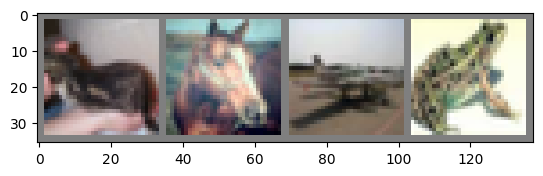

In [145]:
plt.imshow((grid /2 + 0.5).permute(1,2,0))
print(' '.join('%5s' %  classes[labels[j]] for j in range(4)))

# About pooling
1. The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarizing the features lying within the region by the filter.
2. A CNN model architecture is to have a number of convolution and pooling layers stacked one after the other
3. Pooling layer are used to reduce the dimensions of the feature maps. Thus, it reduce the numbers of parameters to learn and the amount of computation in the network.
4. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operation are performed on summarised features instead of precisely positioned features generated by the convolution layer.

## Types of pooling layer
1. Max pooling, a pooling operation to select the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous map.
2. Average pooling computes the average of the elements present in the region of feature map covered by the filter.
3. Global pooling ?



In [ ]:
# Max pooling
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D, AveragePooling2D

image = np.array([
                  [2, 3, 4, 5],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]
                  ])
image = image.reshape(1, 4, 4, 1)

model_max = Sequential([MaxPooling2D(pool_size=2, strides=2)])

model_average = Sequential([AveragePooling2D(pool_size=2, strides=2)])

output_max = model_max.predict(image)

output_average = model_average.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [ ]:
print("The max-pooling output is {}".format(np.squeeze(output_average)))
print("\nThe average-pooling output is {}".format(np.squeeze(output_average)))


The max-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]

The average-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]


# torch.nn.Module
Base class for all neural network module, self-defined models should subclass this class

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 20, 5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    return F.relu(self.conv2(x))